# INTRODUCTION

| ID       | Fullname            |
|----------|---------------------|
| 19127399 | Huỳnh Cao Nhật Hiếu |
| 19127444 | Ngô Đăng Khoa       | 

# LIBRARY

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# Add addition library


## *Read Data*

In [2]:
# Load Data that I will investigate it
df_match = pd.read_csv('Match.csv')
df_player_attribute = pd.read_csv('Player_Attributes.csv')
df_team_attribute = pd.read_csv('Team_Attributes.csv')
df_team = pd.read_csv('Team.csv')
df_player = pd.read_csv('Player.csv')
df_country = pd.read_csv('Country.csv')
df_league = pd.read_csv('League.csv')

# COLLECTING DATA

Dataset: https://www.kaggle.com/abdelrhmanragab/european-soccer-database

- Subject: It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016.  
- Original Data Source:

    You can easily find data about soccer matches but they are usually scattered across different websites. A thorough data collection and processing has been done to make your life easier. I must insist that you do not make any commercial use of the data. The data was sourced from:

    http://football-data.mx-api.enetscores.com/ : scores, lineup, team formation and events

    http://www.football-data.co.uk/ : betting odds. Click here to understand the column naming system for betting odds:

    http://sofifa.com/ : players and teams attributes from EA Sports FIFA games. FIFA series and all FIFA assets property of EA Sports.



# EXPLORING DATA

## df_match

In [3]:
df_match

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- This match dataframe recorded all European football matches from season 2008/2009 to season 2015/16
- This dataframe has 25979 rows and 115 columns
- Each row is a match record 
- Check duplicate rows:

In [4]:
len(df_match.drop_duplicates()) == len(df_match)

True

There is no duplicate rows in this dataframe

### Meaning of each columns:

- **id**: ID of each match
- **country_id**: ID of country where a match takes place, this is a foreign key to Country.csv
- **league_id**: ID of league where a match belongs to, this is a foreign key to League.csv
- **stage**: 
- **date**: Date of a match occurs
- **match_api_id**: match id get from the API
- **home_team_api_id**: Home team id, this a foreign key to Team.csv
- **away_team_api_id**: Away team id, this a foreign key to Team.csv
- **home_team_goal**: Goal scored for the home team
- **away_team_goal**: Goal scored for the away team
- **home_playerXi, home_playerYi**: Home team line up with squad formation (X, Y coordinates)
- **away_playerXi, away_playerYi**: away team line up with squad formation (X, Y coordinates)
- **home_playeri, away_playeri**: Player id of both team, this is a foreign key in Player.csv
- **goal, shoton, shotoff, foulcommit, card, cross, corner, possession**: Stats in a football match
- **Remain columns**: Bet odds of each betting companies, these columns will be described detail in **GIVE THE QUESTION** 
	

### Data types of each columns


In [5]:
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Columns: 115 entries, id to BSA
dtypes: float64(96), int64(9), object(10)
memory usage: 22.8+ MB


### Numerical columns

In [6]:
Numerical = ['home_team_goal', 'away_team_goal','B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA','IWH','IWD','IWA', 'LBH', 'LBD', 'LBA','PSH','PSD','PSA',
                    'WHH','WHD','WHA','SJH','SJD','SJA', 'VCH', 'VCD', 'VCA', 'GBH', 'GBD', 'GBA', 'BSH', 'BSD', 'BSA']
Categorical = ['id', 'country_id','league_id', 'season', 'stage', 'date',	'match_api_id',	'home_team_api_id',	'away_team_api_id',	]
df_match[Numerical]

,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1.73,3.40,5.00,1.75,3.35,4.20,1.85,3.2,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,0,0,1.95,3.20,3.60,1.80,3.30,3.95,1.90,3.2,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,0,3,2.38,3.30,2.75,2.40,3.30,2.55,2.60,3.1,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,5,0,1.44,3.75,7.50,1.40,4.00,6.80,1.40,3.9,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,1,3,5.00,3.50,1.65,5.00,3.50,1.60,4.00,3.3,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25974,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25975,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25976,2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25977,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


percentage of missing values:

In [7]:
df_match.isna().sum()*100 / len(df_match)

id             0.000000
country_id     0.000000
league_id      0.000000
season         0.000000
stage          0.000000
                ...    
GBD           45.486739
GBA           45.486739
BSH           45.490589
BSD           45.490589
BSA           45.490589
Length: 115, dtype: float64

In [8]:
df_match[Numerical].agg(['max', 'min'])

,home_team_goal,away_team_goal,B365H,B365D,B365A,BWH,BWD,BWA,IWH,IWD,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
max,10,9,26.00,17.0,51.00,34.00,19.50,51.0,20.00,11.0,...,41.0,36.00,26.00,67.00,21.00,11.00,34.00,17.00,13.00,34.00
min,0,0,1.04,1.4,1.08,1.03,1.65,1.1,1.03,1.5,...,1.1,1.03,1.62,1.08,1.05,1.45,1.12,1.04,1.33,1.12


### Categorical columns

In [9]:
df_match[Categorical]

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985
...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992091,10190,10191
25975,25976,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992092,9824,10199
25976,25977,24558,24558,2015/2016,9,2015-09-23 00:00:00,1992093,9956,10179
25977,25978,24558,24558,2015/2016,9,2015-09-22 00:00:00,1992094,7896,10243


In [10]:
df_match[Categorical].agg(['max', 'min'])

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id
max,25979,24558,24558,2015/2016,38,2016-05-25 00:00:00,2216672,274581,274581
min,1,1,1,2008/2009,1,2008-07-18 00:00:00,483129,1601,1601


## df_player_attribute

In [11]:
df_player_attribute

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,183974,102359,39902,2009-08-30 00:00:00,83.0,85.0,right,medium,low,84.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,183975,102359,39902,2009-02-22 00:00:00,78.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,183976,102359,39902,2008-08-30 00:00:00,77.0,80.0,right,medium,low,74.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,183977,102359,39902,2007-08-30 00:00:00,78.0,81.0,right,medium,low,74.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


- This dataframe has 183,978 rows and 42 columns
- Each row describe stats, attributes of each player in many seasons
- Check duplicate rows: 

In [12]:
len(df_player_attribute.drop_duplicates()) - len(df_player_attribute)

0

### Meaning each of each column:

- **id**: id of each player in a season
- **player_fifa_api_id**: id from fifa api
- **player_api_id**: id from other api
- **date**: Update date of a player
- **overall_ratings**: Overall ratings from fifa
- **potential**: Maximum overall rating of a player in a season
- **preferred_foot**: preferred foot of a player
- **attacking_work_rate**: attacking_work_rate of a player
- **defensive_work_rate**: defensive_work_rate of a player
- **remain columns**: All stats of a player in fifa

### Datatypes:

In [13]:
df_player_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

### Numerical and categoricals columns

In [14]:
Numerical = ['overall_rating',	'potential', 'preferred_foot',	'attacking_work_rate',	'defensive_work_rate',	'crossing',	'finishing', 
            'heading_accuracy',	'short_passing', 'volleys',	'dribbling', 'curve',	'free_kick_accuracy', 'long_passing',	
            'ball_control',	'acceleration',	'sprint_speed',	'agility',	'reactions','balance',	'shot_power',	'jumping',	
            'stamina',	'strength',	'long_shots',	'aggression',	'interceptions','positioning',	'vision','penalties',	
            'marking',	'standing_tackle',	'sliding_tackle',	'gk_diving',	'gk_handling',	'gk_kicking',	'gk_positioning','gk_reflexes']
Categorical = ['date', 'player_fifa_api_id', 'player_api_id']

percentage of missing values: 

In [15]:
df_player_attribute.isna().sum()*100 / len(df_player_attribute)

id                     0.000000
player_fifa_api_id     0.000000
player_api_id          0.000000
date                   0.000000
overall_rating         0.454402
potential              0.454402
preferred_foot         0.454402
attacking_work_rate    1.755645
defensive_work_rate    0.454402
crossing               0.454402
finishing              0.454402
heading_accuracy       0.454402
short_passing          0.454402
volleys                1.474633
dribbling              0.454402
curve                  1.474633
free_kick_accuracy     0.454402
long_passing           0.454402
ball_control           0.454402
acceleration           0.454402
sprint_speed           0.454402
agility                1.474633
reactions              0.454402
balance                1.474633
shot_power             0.454402
jumping                1.474633
stamina                0.454402
strength               0.454402
long_shots             0.454402
aggression             0.454402
interceptions          0.454402
position

In [16]:
df_player_attribute[Numerical]

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,83.0,85.0,right,medium,low,84.0,77.0,59.0,89.0,77.0,...,88.0,83.0,22.0,31.0,30.0,9.0,20.0,84.0,20.0,20.0
183974,78.0,80.0,right,medium,low,74.0,76.0,53.0,84.0,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183975,77.0,80.0,right,medium,low,74.0,71.0,53.0,84.0,77.0,...,88.0,70.0,32.0,31.0,30.0,9.0,20.0,73.0,20.0,20.0
183976,78.0,81.0,right,medium,low,74.0,64.0,57.0,86.0,77.0,...,88.0,53.0,28.0,32.0,30.0,9.0,20.0,73.0,20.0,20.0


In [17]:
df_player_attribute[Categorical]

,date,player_fifa_api_id,player_api_id
0,2016-02-18 00:00:00,218353,505942
1,2015-11-19 00:00:00,218353,505942
2,2015-09-21 00:00:00,218353,505942
3,2015-03-20 00:00:00,218353,505942
4,2007-02-22 00:00:00,218353,505942
...,...,...,...
183973,2009-08-30 00:00:00,102359,39902
183974,2009-02-22 00:00:00,102359,39902
183975,2008-08-30 00:00:00,102359,39902
183976,2007-08-30 00:00:00,102359,39902


In [18]:
df_player_attribute[Numerical].agg(['max','min'])

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
max,94.0,97.0,95.0,97.0,98.0,97.0,93.0,97.0,94.0,97.0,...,97.0,96.0,96.0,95.0,95.0,94.0,93.0,97.0,96.0,96.0
min,33.0,39.0,1.0,1.0,1.0,3.0,1.0,1.0,2.0,1.0,...,1.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0


In [19]:
df_player_attribute[Categorical].agg(['max','min'])

,date,player_fifa_api_id,player_api_id
max,2016-07-07 00:00:00,234141,750584
min,2007-02-22 00:00:00,2,2625


## df_team_attribute

In [20]:
df_team_attribute

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,52,Balanced,NaN,Little,52,Mixed,...,53,Normal,Organised,46,Medium,48,Press,53,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,50,Normal,Organised,44,Medium,55,Press,53,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,54,Balanced,NaN,Little,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,54,Balanced,42.0,Normal,51,Mixed,...,32,Little,Organised,44,Medium,58,Press,37,Normal,Cover


- This dataframe has 1458 rows and 25 columns
- Each row describe stats and team's attributes in a season
- Check duplicate rows:

In [21]:
len(df_team_attribute.drop_duplicates()) - len(df_team_attribute)

0

### Meaning of each column:

- **id**: id for a team in a season
- **team_fifa_api_id**: id of a team in fifa_api
- **team_api_id**: id from other api
- **date**: Update date of a team
- **remain columns**: stats for defence and attack styles of a team

### Data types

In [22]:
df_team_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_api_id                     1458 non-null   int64  
 3   date                            1458 non-null   object 
 4   buildUpPlaySpeed                1458 non-null   int64  
 5   buildUpPlaySpeedClass           1458 non-null   object 
 6   buildUpPlayDribbling            489 non-null    float64
 7   buildUpPlayDribblingClass       1458 non-null   object 
 8   buildUpPlayPassing              1458 non-null   int64  
 9   buildUpPlayPassingClass         1458 non-null   object 
 10  buildUpPlayPositioningClass     1458 non-null   object 
 11  chanceCreationPassing           1458 non-null   int64  
 12  chanceCreationPassingClass      14

### Numerical and Categorical columns

In [23]:
Numerical = ['buildUpPlaySpeed', 'buildUpPlayDribbling', 'buildUpPlayPassing', 'chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting',
'defencePressure', 'defenceAggression', 'defenceTeamWidth']
Categorical = ['id', 'team_fifa_api_id','team_api_id', 'date', 'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass', 'buildUpPlayPassingClass',
'buildUpPlayPositioningClass', 'chanceCreationPassingClass', 'chanceCreationCrossingClass', 'chanceCreationShootingClass', 'chanceCreationPositioningClass',
'defencePressureClass', 'defenceAggressionClass','defenceTeamWidthClass', 'defenceDefenderLineClass']

percentage of missing value:

In [24]:
df_team_attribute.isna().sum()*100 / len(df_team_attribute)

id                                 0.000000
team_fifa_api_id                   0.000000
team_api_id                        0.000000
date                               0.000000
buildUpPlaySpeed                   0.000000
buildUpPlaySpeedClass              0.000000
buildUpPlayDribbling              66.460905
buildUpPlayDribblingClass          0.000000
buildUpPlayPassing                 0.000000
buildUpPlayPassingClass            0.000000
buildUpPlayPositioningClass        0.000000
chanceCreationPassing              0.000000
chanceCreationPassingClass         0.000000
chanceCreationCrossing             0.000000
chanceCreationCrossingClass        0.000000
chanceCreationShooting             0.000000
chanceCreationShootingClass        0.000000
chanceCreationPositioningClass     0.000000
defencePressure                    0.000000
defencePressureClass               0.000000
defenceAggression                  0.000000
defenceAggressionClass             0.000000
defenceTeamWidth                

In [25]:
df_team_attribute[Numerical]

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
0,60,NaN,50,60,65,55,50,55,45
1,52,48.0,56,54,63,64,47,44,54
2,47,41.0,54,54,63,64,47,44,54
3,70,NaN,70,70,70,70,60,70,70
4,47,NaN,52,53,48,52,47,47,52
...,...,...,...,...,...,...,...,...,...
1453,52,NaN,52,52,48,53,46,48,53
1454,54,NaN,51,47,52,50,44,55,53
1455,54,NaN,51,47,52,32,44,58,37
1456,54,42.0,51,47,52,32,44,58,37


In [26]:
df_team_attribute[Numerical].agg(['max', 'min'])

,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
max,80,77.0,80,80,80,80,72,72,73
min,20,24.0,20,21,20,22,23,24,29


In [27]:
df_team_attribute[Categorical]

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,Balanced,Normal,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,Fast,Little,Long,Organised,Risky,Lots,Lots,Organised,Medium,Double,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,1454,15005,10000,2011-02-22 00:00:00,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
1454,1455,15005,10000,2012-02-22 00:00:00,Balanced,Little,Mixed,Organised,Normal,Normal,Normal,Organised,Medium,Press,Normal,Cover
1455,1456,15005,10000,2013-09-20 00:00:00,Balanced,Little,Mixed,Organised,Normal,Normal,Little,Organised,Medium,Press,Normal,Cover
1456,1457,15005,10000,2014-09-19 00:00:00,Balanced,Normal,Mixed,Organised,Normal,Normal,Little,Organised,Medium,Press,Normal,Cover


In [28]:
df_team_attribute[Categorical].agg(['max', 'min'])

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassingClass,chanceCreationCrossingClass,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressureClass,defenceAggressionClass,defenceTeamWidthClass,defenceDefenderLineClass
max,1458,112513,274581,2015-09-10 00:00:00,Slow,Normal,Short,Organised,Safe,Normal,Normal,Organised,Medium,Press,Wide,Offside Trap
min,1,1,1601,2010-02-22 00:00:00,Balanced,Little,Long,Free Form,Normal,Little,Little,Free Form,Deep,Contain,Narrow,Cover


## df_country

In [29]:
df_country

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


- This dataframe has 2 columns and 11 rows
- Each rows is a country
- There are no duplicate rows in this dataframe

### Meaning of each columns:

- **id**: id for each country
- **name**: names of countries

### Data type

In [30]:
df_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      11 non-null     int64 
 1   name    11 non-null     object
dtypes: int64(1), object(1)
memory usage: 304.0+ bytes


## df_league

In [31]:
df_league

,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A
5,13274,13274,Netherlands Eredivisie
6,15722,15722,Poland Ekstraklasa
7,17642,17642,Portugal Liga ZON Sagres
8,19694,19694,Scotland Premier League
9,21518,21518,Spain LIGA BBVA


- This dataframe has 11 rows and 3 columns
- Each rows is a football league
- There is no duplicate rows in this dataframe

### Meaning of each columns:

- **id**: id for leagues
- **country_id**: Country of a league
- **name**: League's names

### Data types:

In [32]:
df_league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


## df_player

In [33]:
df_player

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


- This dataframe has 11,060 rows and 7 columns
- Each column is the information for a player
- Check duplicate rows: 

In [34]:
len(df_player.drop_duplicates()) - len(df_player)

0

### Data types

In [35]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


### Meaning of each column

- **id**: id for each player
- **player_api_id**: id from api
- **player_fifa_api_id**: id from fifa api
- **player_name**: names of football players
- **birthday**: Date of birt of a player
- **height**: height of a player (cm)
- **weight**: weight of a player (pound)

### Numerical and categorical  

In [36]:
Numerical = ['weight', 'height']
Categorical = ['id','player_api_id', 'player_name', 'player_fifa_api_id', 'birthday']

percentage of missing value

In [37]:
df_player.isna().sum()*100 / len(df_player)

id                    0.0
player_api_id         0.0
player_name           0.0
player_fifa_api_id    0.0
birthday              0.0
height                0.0
weight                0.0
dtype: float64

In [38]:
df_player[Numerical]

,weight,height
0,187,182.88
1,146,170.18
2,163,170.18
3,198,182.88
4,154,182.88
...,...,...
11055,168,182.88
11056,176,182.88
11057,154,180.34
11058,172,185.42


In [39]:
df_player[Numerical].agg(['max', 'min'])

,weight,height
max,243,208.28
min,117,157.48


In [40]:
df_player[Categorical]

,id,player_api_id,player_name,player_fifa_api_id,birthday
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00
...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00


In [41]:
df_player[Categorical].agg(['max', 'min'])

,id,player_api_id,player_name,player_fifa_api_id,birthday
max,11075,750584,dos Santos Fabio Junior,234141,1999-04-24 00:00:00
min,1,2625,Aaron Appindangoye,2,1967-01-23 00:00:00


## df_team

In [42]:
df_team

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB
...,...,...,...,...,...
294,49479,10190,898.0,FC St. Gallen,GAL
295,49837,10191,1715.0,FC Thun,THU
296,50201,9777,324.0,Servette FC,SER
297,50204,7730,1862.0,FC Lausanne-Sports,LAU


- This dataframe has 299 rows and 5 columns
- Each row is a team
- Check duplicate rows:

In [43]:
len(df_team.drop_duplicates()) - len(df_team)

0

### Data types

In [44]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


### Meaning of each column

- **id**: id of a team
- **team_api_id**: id of a team from api
- **team_fifa_api_id**: id of a team from fifa api
- **team_long_name**: Full name of a team
- **team_short_name**: Short name of a team

### All of columns in this dataframe are categorical

In [45]:
df_team.agg(['max', 'min'])

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
max,51606,274581,112513.0,Śląsk Wrocław,ZWO
min,1,1601,1.0,1. FC Kaiserslautern,AAR


# GIVE THE QUESTION

## 1.  Analyze the style play of the teams in the dataset and give the insight about it.

*Note*: in this question, we use some dataframes such as: 
- `df_team_attribute` to analyze the play-style of the football team.
- `df_team` to display the name as well as the information of the team. 
- `df_match` to analyze and display the number of win or lose or draw and other things related to victory of the team.

In [46]:
"""Split categorical columns and numerical comlumns"""
cat_cols = ['id', 'team_fifa_api_id', 'team_api_id', 'date', 
       'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass', 
       'buildUpPlayPassingClass', 'buildUpPlayPositioningClass', 
       'chanceCreationPassingClass', 'chanceCreationCrossingClass', 
       'chanceCreationShootingClass','chanceCreationPositioningClass',
       'defencePressureClass', 'defenceAggressionClass', 
       'defenceTeamWidthClass','defenceDefenderLineClass']

num_cols = list( set(list(df_team_attribute.columns)) - set(cat_cols) )

### Firstly, we work with categorical columns.

In [47]:
df_team_attribute[cat_cols].isnull().sum()

id                                0
team_fifa_api_id                  0
team_api_id                       0
date                              0
buildUpPlaySpeedClass             0
buildUpPlayDribblingClass         0
buildUpPlayPassingClass           0
buildUpPlayPositioningClass       0
chanceCreationPassingClass        0
chanceCreationCrossingClass       0
chanceCreationShootingClass       0
chanceCreationPositioningClass    0
defencePressureClass              0
defenceAggressionClass            0
defenceTeamWidthClass             0
defenceDefenderLineClass          0
dtype: int64

There is no comlumns missing values. So we can work with these categories.

In [48]:
"""Function to stat the atrribute class and visualize them with pie chart"""
def statisticAttributeClass(attribute):
    print(df_team_attribute[attribute].value_counts())
    plt.pie(df_team_attribute[attribute].value_counts().values, labels=df_team_attribute[attribute].value_counts().keys())
    plt.title(attribute)
    plt.show();

Balanced    1184
Fast         172
Slow         102
Name: buildUpPlaySpeedClass, dtype: int64


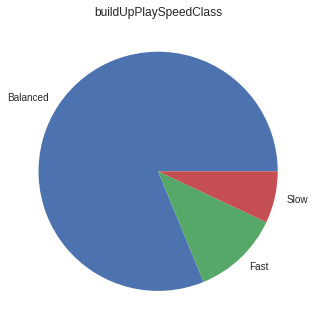



Little    1004
Normal     433
Lots        21
Name: buildUpPlayDribblingClass, dtype: int64


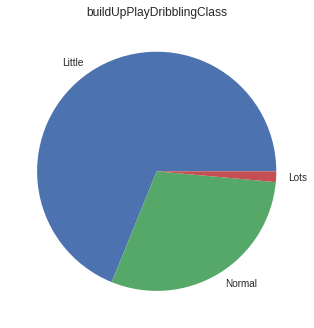



Mixed    1236
Short     128
Long       94
Name: buildUpPlayPassingClass, dtype: int64


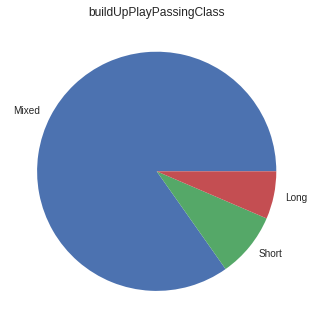



Organised    1386
Free Form      72
Name: buildUpPlayPositioningClass, dtype: int64


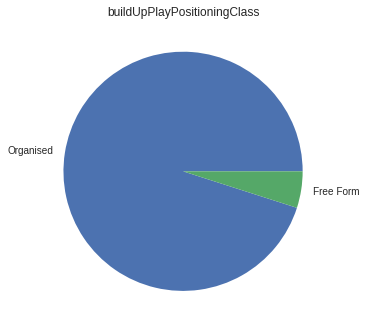



Normal    1231
Risky      171
Safe        56
Name: chanceCreationPassingClass, dtype: int64


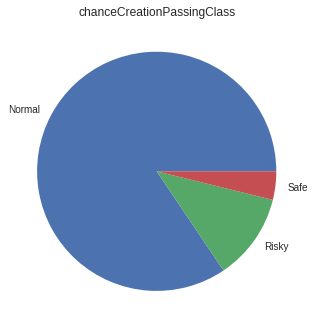



Normal    1195
Lots       211
Little      52
Name: chanceCreationCrossingClass, dtype: int64


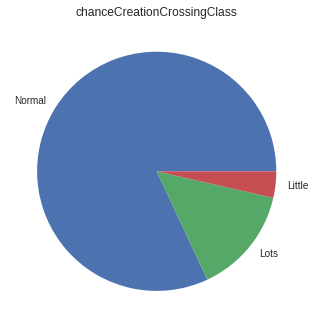



Normal    1224
Lots       197
Little      37
Name: chanceCreationShootingClass, dtype: int64


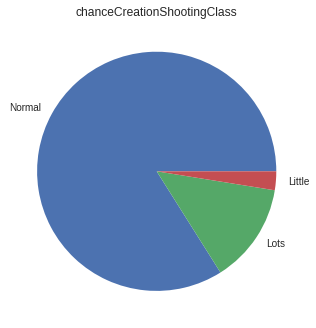



Organised    1309
Free Form     149
Name: chanceCreationPositioningClass, dtype: int64


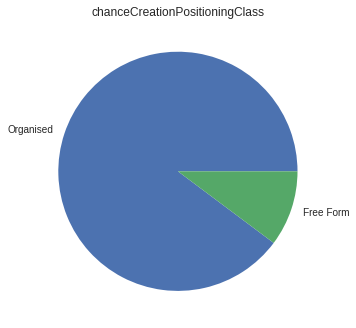



Medium    1243
Deep       154
High        61
Name: defencePressureClass, dtype: int64


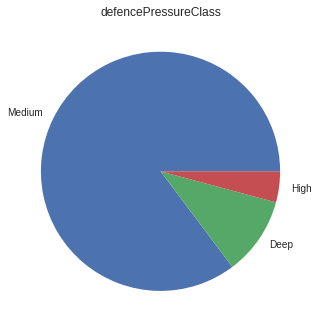



Press      1274
Double       99
Contain      85
Name: defenceAggressionClass, dtype: int64


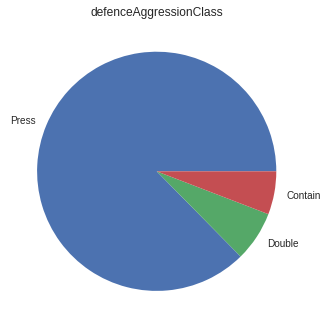



Normal    1286
Wide       111
Narrow      61
Name: defenceTeamWidthClass, dtype: int64


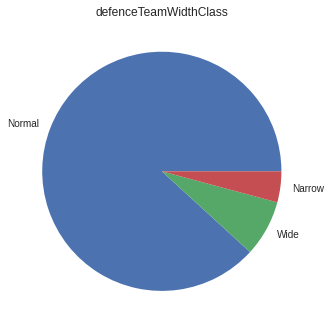



Cover           1362
Offside Trap      96
Name: defenceDefenderLineClass, dtype: int64


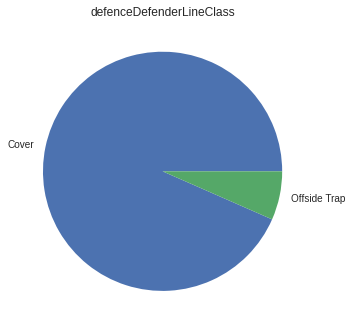

In [49]:
for i in cat_cols[4:]:
    statisticAttributeClass(i)
    print('\n')

In 12 pie charts above, we find the style play that almost teams apply to attribute classes.

In [50]:
"""attribute classes that almost teams applied"""
frequent_attrs_class_almost_team = dict()
for i in cat_cols[4:]:
    frequent_attrs_class_almost_team.update({i : df_team_attribute[i].value_counts().keys()[0]})
frequent_attrs_class_almost_team

{'buildUpPlaySpeedClass': 'Balanced',
 'buildUpPlayDribblingClass': 'Little',
 'buildUpPlayPassingClass': 'Mixed',
 'buildUpPlayPositioningClass': 'Organised',
 'chanceCreationPassingClass': 'Normal',
 'chanceCreationCrossingClass': 'Normal',
 'chanceCreationShootingClass': 'Normal',
 'chanceCreationPositioningClass': 'Organised',
 'defencePressureClass': 'Medium',
 'defenceAggressionClass': 'Press',
 'defenceTeamWidthClass': 'Normal',
 'defenceDefenderLineClass': 'Cover'}

From the result above, we find that: almost teams apllied the style play:
- 'buildUpPlaySpeedClass': `Balanced`
- 'buildUpPlayDribblingClass': `Little`,
- 'buildUpPlayPassingClass': 'Mixed',
- 'buildUpPlayPositioningClass': `Organised`,
- 'chanceCreationPassingClass': `Normal`,
- 'chanceCreationCrossingClass': `Normal`,
- 'chanceCreationShootingClass': `Normal`,
- 'chanceCreationPositioningClass': `Organised`,
- 'defencePressureClass': `Medium`,
- 'defenceAggressionClass': `Press`,
- 'defenceTeamWidthClass': `Normal`,
- 'defenceDefenderLineClass': `Cover`

Therefore, now, we find top 10 football teams that have the top win match and analyse the style play of them. We will compare the similar in them and the frequent_attrs_class we find above.

In [51]:
"""Show df_match"""
match_features = ['id', 'country_id','league_id', 'season', 'date', 'match_api_id', 
                    'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal']
df_match = df_match[match_features]
df_match

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1
1,2,1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0
2,3,1,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3
3,4,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0
4,5,1,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3
...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0
25975,25976,24558,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2
25976,25977,24558,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0
25977,25978,24558,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0


In [52]:
"""Function add column Winner to the df_match to find the team win in each match"""
def winner(row):
    if row['home_team_goal'] > row['away_team_goal']:
        return row['home_team_api_id']
    elif row['home_team_goal'] < row['away_team_goal']:
        return row['away_team_api_id']
    else:
        return 'Tie'

df_match['Winner'] = df_match.apply(winner, axis=1)
df_match

,id,country_id,league_id,season,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Winner
0,1,1,1,2008/2009,2008-08-17 00:00:00,492473,9987,9993,1,1,Tie
1,2,1,1,2008/2009,2008-08-16 00:00:00,492474,10000,9994,0,0,Tie
2,3,1,1,2008/2009,2008-08-16 00:00:00,492475,9984,8635,0,3,8635
3,4,1,1,2008/2009,2008-08-17 00:00:00,492476,9991,9998,5,0,9991
4,5,1,1,2008/2009,2008-08-16 00:00:00,492477,7947,9985,1,3,9985
...,...,...,...,...,...,...,...,...,...,...,...
25974,25975,24558,24558,2015/2016,2015-09-22 00:00:00,1992091,10190,10191,1,0,10190
25975,25976,24558,24558,2015/2016,2015-09-23 00:00:00,1992092,9824,10199,1,2,10199
25976,25977,24558,24558,2015/2016,2015-09-23 00:00:00,1992093,9956,10179,2,0,9956
25977,25978,24558,24558,2015/2016,2015-09-22 00:00:00,1992094,7896,10243,0,0,Tie


In [53]:
"""Top 10 teams have the most victory"""
top_10_id_teams_most_victories = df_match['Winner'].value_counts()[1:11].keys()
df_team[df_team['team_api_id'].isin(top_10_id_teams_most_victories)]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
25,3457,10260,11.0,Manchester United,MUN
94,15617,9823,21.0,FC Bayern Munich,BMU
133,20522,9885,45.0,Juventus,JUV
161,26552,8593,245.0,Ajax,AJA
205,35283,9773,236.0,FC Porto,POR
216,35294,9772,234.0,SL Benfica,BEN
242,39395,9925,78.0,Celtic,CEL
256,43040,8633,243.0,Real Madrid CF,REA
258,43042,8634,241.0,FC Barcelona,BAR
287,49118,9931,896.0,FC Basel,BAS


We have had top 10 teams that have the most victory in the period of the dataset. 
So now, we start to analyse the team atrributes of ten football teams above.

In [54]:
df_team_attr_of_top_10 = df_team_attribute[df_team_attribute['team_api_id'].isin(top_10_id_teams_most_victories)]
df_team_attr_of_top_10

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
33,34,245,8593,2010-02-22 00:00:00,30,Slow,NaN,Little,30,Short,...,70,Lots,Organised,30,Deep,30,Contain,30,Narrow,Cover
34,35,245,8593,2011-02-22 00:00:00,40,Balanced,NaN,Little,38,Mixed,...,67,Lots,Organised,65,Medium,57,Press,63,Normal,Cover
35,36,245,8593,2012-02-22 00:00:00,31,Slow,NaN,Little,33,Short,...,46,Normal,Free Form,68,High,65,Press,60,Normal,Cover
36,37,245,8593,2013-09-20 00:00:00,35,Balanced,NaN,Little,33,Short,...,46,Normal,Free Form,68,High,65,Press,50,Normal,Cover
37,38,245,8593,2014-09-19 00:00:00,40,Balanced,40.0,Normal,30,Short,...,39,Normal,Free Form,64,Medium,53,Press,64,Normal,Cover
38,39,245,8593,2015-09-10 00:00:00,35,Balanced,43.0,Normal,39,Mixed,...,30,Little,Free Form,64,Medium,53,Press,59,Normal,Cover
118,119,241,8634,2010-02-22 00:00:00,42,Balanced,NaN,Little,30,Short,...,70,Lots,Free Form,70,High,30,Contain,70,Wide,Offside Trap
119,120,241,8634,2011-02-22 00:00:00,43,Balanced,NaN,Little,34,Mixed,...,68,Lots,Free Form,67,High,43,Press,68,Wide,Cover
120,121,241,8634,2012-02-22 00:00:00,24,Slow,NaN,Little,25,Short,...,54,Normal,Free Form,66,Medium,63,Press,66,Normal,Cover
121,122,241,8634,2013-09-20 00:00:00,35,Balanced,NaN,Little,32,Short,...,35,Normal,Free Form,61,Medium,63,Press,65,Normal,Cover


In [55]:
def attrs_of_each_team(team_api_id):
    dict_of_team_attrs = dict()
    dict_of_attrs = dict()

    for i in cat_cols[4:]:
        name_team = df_team[df_team['team_api_id'] == team_api_id]['team_long_name'].values[0]
        frequent_attr = df_team_attr_of_top_10[df_team_attr_of_top_10['team_api_id'] == team_api_id][i].value_counts().keys()[0]

        dict_of_attrs.update({ i : frequent_attr})
        
    dict_of_team_attrs.update({name_team : dict_of_attrs})
    
    return dict_of_team_attrs

In [56]:
dict_10_team_attrs = dict()
for id in top_10_id_teams_most_victories:
    dict_10_team_attrs.update(attrs_of_each_team(id))
df_10_team_attrs = pd.DataFrame(dict_10_team_attrs)
df_10_team_attrs

,FC Barcelona,Real Madrid CF,Celtic,FC Bayern Munich,Manchester United,Juventus,SL Benfica,FC Porto,Ajax,FC Basel
buildUpPlaySpeedClass,Balanced,Balanced,Fast,Balanced,Balanced,Balanced,Balanced,Balanced,Balanced,Balanced
buildUpPlayDribblingClass,Little,Little,Little,Little,Little,Little,Little,Little,Little,Little
buildUpPlayPassingClass,Short,Mixed,Mixed,Mixed,Mixed,Short,Mixed,Mixed,Short,Mixed
buildUpPlayPositioningClass,Free Form,Free Form,Organised,Free Form,Organised,Organised,Organised,Organised,Free Form,Organised
chanceCreationPassingClass,Normal,Risky,Normal,Normal,Normal,Normal,Normal,Normal,Normal,Normal
chanceCreationCrossingClass,Little,Normal,Normal,Little,Lots,Normal,Normal,Normal,Normal,Normal
chanceCreationShootingClass,Normal,Lots,Normal,Normal,Normal,Lots,Normal,Lots,Normal,Normal
chanceCreationPositioningClass,Free Form,Free Form,Organised,Free Form,Organised,Organised,Organised,Organised,Free Form,Organised
defencePressureClass,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium,Medium
defenceAggressionClass,Press,Press,Press,Press,Press,Press,Press,Press,Press,Press


The similar proportion of top 10 winning teams in atrribute classes compared to the almost teams
FC Barcelona 	 66.66666666666666
Real Madrid CF 	 66.66666666666666
Celtic 	 91.66666666666666
FC Bayern Munich 	 75.0
Manchester United 	 91.66666666666666
Juventus 	 83.33333333333334
SL Benfica 	 100.0
FC Porto 	 91.66666666666666
Ajax 	 75.0
FC Basel 	 100.0


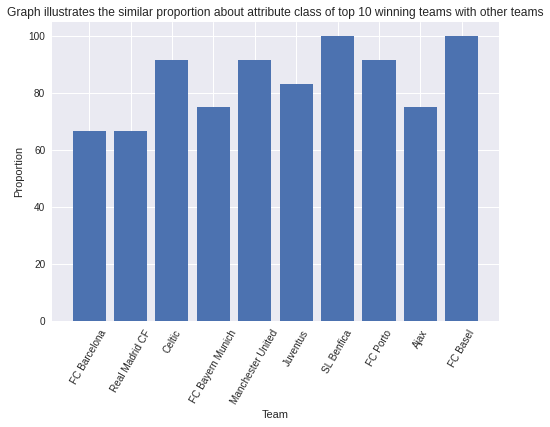

In [57]:
list_similar_proportion = []

print("The similar proportion of top 10 winning teams in atrribute classes compared to the almost teams")

for team in df_10_team_attrs:
    similar = (df_10_team_attrs[team].values == list(frequent_attrs_class_almost_team.values())).mean()*100
    list_similar_proportion.append(similar)
    print( team,'\t', similar)

plt.bar(list(df_10_team_attrs.columns), list_similar_proportion)
plt.xticks(rotation=60)
plt.xlabel('Team')
plt.ylabel('Proportion')
plt.title('Graph illustrates the similar proportion about attribute class of top 10 winning teams with other teams');

### *Next, we work with numerical columns. We have preprocessed the missing values above, so now we analyze and visualize the numerical columns*

In [58]:
df_team_attribute[num_cols].describe()

,defenceTeamWidth,chanceCreationPassing,defenceAggression,chanceCreationCrossing,chanceCreationShooting,buildUpPlayDribbling,buildUpPlayPassing,buildUpPlaySpeed,defencePressure
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000
mean,52.185871,52.165295,49.251029,53.731824,53.969136,48.607362,48.490398,52.462277,46.017147
std,9.574712,10.360793,9.738028,11.086796,10.327566,9.678290,10.896101,11.545869,10.227225
min,29.000000,21.000000,24.000000,20.000000,22.000000,24.000000,20.000000,20.000000,23.000000
25%,47.000000,46.000000,44.000000,47.000000,48.000000,42.000000,40.000000,45.000000,39.000000
50%,52.000000,52.000000,48.000000,53.000000,53.000000,49.000000,50.000000,52.000000,45.000000
75%,58.000000,59.000000,55.000000,62.000000,61.000000,55.000000,55.000000,62.000000,51.000000
max,73.000000,80.000000,72.000000,80.000000,80.000000,77.000000,80.000000,80.000000,72.000000


Table above display the stats of the numerical columns in `df_team_attribute`. We can see all columns also have 1458 rows and do not have miss-value. 
Next, we see the mean(average), median, min, max as well as Q1 and Q3, all stats are normal except `buildUpPlayDribbling`. `buildUpPlayDribbling` miss above 66% so we fill mean value of the columns for miss-value --> so Q1,Q2,Q3 are the same value as 48.6.

In [59]:
df_team_attribute[num_cols]

,defenceTeamWidth,chanceCreationPassing,defenceAggression,chanceCreationCrossing,chanceCreationShooting,buildUpPlayDribbling,buildUpPlayPassing,buildUpPlaySpeed,defencePressure
0,45,60,55,65,55,NaN,50,60,50
1,54,54,44,63,64,48.0,56,52,47
2,54,54,44,63,64,41.0,54,47,47
3,70,70,70,70,70,NaN,70,70,60
4,52,53,47,48,52,NaN,52,47,47
...,...,...,...,...,...,...,...,...,...
1453,53,52,48,48,53,NaN,52,52,46
1454,53,47,55,52,50,NaN,51,54,44
1455,37,47,58,52,32,NaN,51,54,44
1456,37,47,58,52,32,42.0,51,54,44


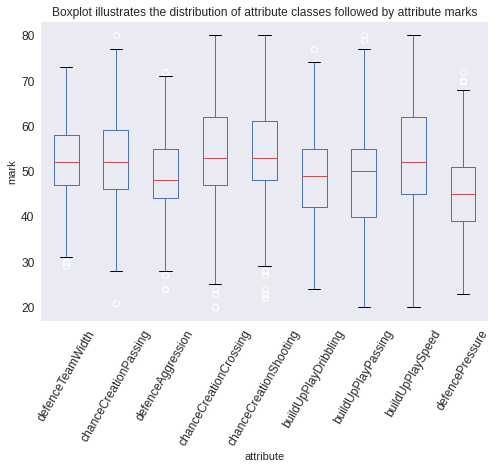

In [60]:
ax = df_team_attribute[num_cols].boxplot(rot=60, grid=False, fontsize=12)
ax.set_title('Boxplot illustrates the distribution of attribute classes followed by attribute marks')
ax.set_xlabel('attribute')
ax.set_ylabel('mark');

- Because columns `buildUpPlayDribbling` missing too much values and fill by mean value, so visualize this columns with box plot is not meaningful. 
Therefore, we visualize other numerical columns with box plot.
- In boxplot, we see that all attribute classes distribute Q1 and Q3 in the middle marks (40 - 60). But the min and max of attribute classes have the long distance compared to Q1 and Q3. This prove a thing that most football teams play with a neutral style in play-style. And a few of team adjust some attributes to fit with their team.

Next, we compare the attribute classes marks among 2 team have the most victories in the dataset.

In [61]:
top_2_id_teams_most_victories = df_match['Winner'].value_counts()[1:3].keys()
df_team[df_team['team_api_id'].isin(top_2_id_teams_most_victories)]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
256,43040,8633,243.0,Real Madrid CF,REA
258,43042,8634,241.0,FC Barcelona,BAR


Two team have the most victories is Real Mandrid and FC Barcelona. So now, we compare the style play of 2 team to see the difference.

In [62]:
TopWinner = df_match['Winner'].value_counts()[1:3].index.tolist()
topTeam = pd.DataFrame(df_team_attribute[df_team_attribute['team_api_id'].isin(TopWinner)])

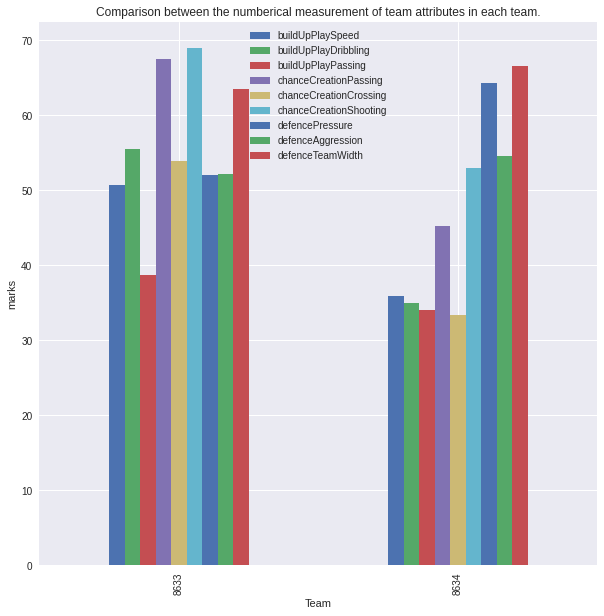

In [63]:
topTeam.groupby(by = "team_api_id").mean()[['buildUpPlaySpeed','buildUpPlayDribbling','buildUpPlayPassing',\
                                            'chanceCreationPassing','chanceCreationCrossing', 'chanceCreationShooting','defencePressure', \
                                            'defenceAggression', 'defenceTeamWidth']].plot(kind = "bar", figsize=(10,10))
plt.xlabel('Team')
plt.ylabel('marks')
plt.title('Comparison between the numberical measurement of team attributes in each team.');

`Real Madrid CF: 8633` </br>
`FC Barcelona  : 8634`

- In the graph above, we see that:
    - Real Madrid CF want to use play style tend to `create passing`, `create shooting` and the `defence team width` high with the distance of player far. Other attributes remain in the medium mark.
    - FC Barcelona choose to `defence aggression` and `defence team width` high.



We continue to compare the numerical measurement of team attributes in the top team with the bottom team(measured by victories match)

In [64]:
TopWinner = df_match['Winner'].value_counts()[1:2].index.tolist()
BottomWinner = df_match['Winner'].value_counts()[-1:].index.tolist()

In [65]:
df_team[df_team['team_api_id'].isin(TopWinner)]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
258,43042,8634,241.0,FC Barcelona,BAR


Top team is `FC Barcelona`.

In [66]:
df_team[df_team['team_api_id'].isin(BottomWinner)]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
82,11074,108893,111989.0,AC Arles-Avignon,ARL


Bottom team is `AC Arles-Avignon`

So now, we compare the numerical measurement of team attributes:

In [67]:
topTeam = pd.DataFrame(df_team_attribute[df_team_attribute['team_api_id'].isin(TopWinner)])
bottomTeam = pd.DataFrame(df_team_attribute[df_team_attribute['team_api_id'].isin(BottomWinner)])

twoTeams = topTeam.append(bottomTeam)

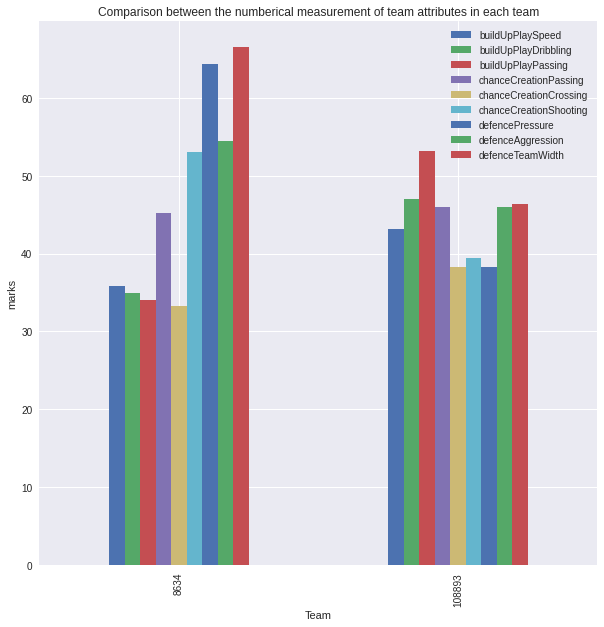

In [68]:
twoTeams.groupby(by = "team_api_id").mean()[['buildUpPlaySpeed','buildUpPlayDribbling','buildUpPlayPassing',\
                    'chanceCreationPassing','chanceCreationCrossing', 'chanceCreationShooting','defencePressure',\
                     'defenceAggression', 'defenceTeamWidth']].plot(kind = "bar",figsize=(10,10))

plt.title('Comparison between the numberical measurement of team attributes in each team')
plt.xlabel('Team')
plt.ylabel('marks');

`8634: FC Barcelona `</br>
`108893: AC Arles-Avignon`

According to the plot, there is a large difference between FC Barcelona (more frequent winner) and AC Aries-Avignon mean values for the numerical attributes. FC Barcelona has a greater defenceTeamWidth, defenceAggression, defencePrressure, and chanceCreation shooting.

---

In conclusion,
- The strategy to win the match of all football teams is rather similar with the similar rate of top 10 teams have the most victories are more than 65% compared to the frequent attribute classes that all teams in dataset use. But the difference is that the mark of numerical attributes, each football team adjust the mark of numerical attributes to accordable with the play style that the team tend to. </br>
- Some of the top winning teams include FC Barcelona, Real Madrid CF, Manchester United. When comparing one of the top winning team to a low-scoring team, we figured that the top winning team has a greater defenceTeamWidth, defenceAggression, defencePrressure, and chanceCreation shooting, all of which might be feature that correlate with the team's success.